# Wavefolding

Wavefolding is a form of waveshaping, working with periodic transfer functions.
A simple basic transfer function is a sine with the appropriate scaling factor:

$y[n] = sin( \frac{\pi}{2} x[n]) $
 
For an input signal $x$ limited to values between $-1$ and $1$,
this results in a transfer function with saturation:

<IPython.core.display.Javascript object>


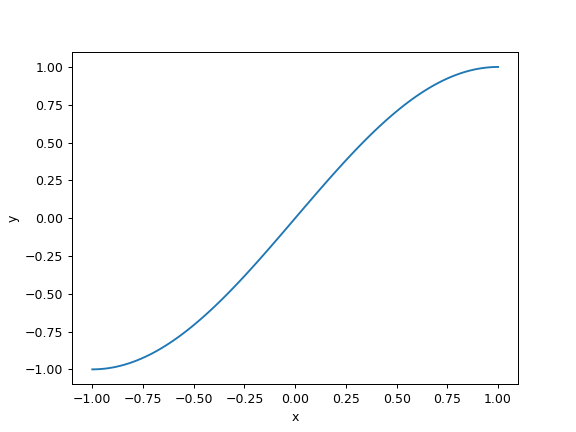

Text(0, 0.5, 'y')

In [68]:
# load relevant modules from header file
%run ../../header.ipynb

x = np.linspace(-1,1,100);

plt.plot(x,np.sin(np.pi/2 * x));

plt.xlabel('x')
plt.ylabel('y')

When the input signal exceeds the boundaries $-1$ and $1$, the signal does not clip
but is folded back. This can be achieved by amplifying the input with an additional gain:


<IPython.core.display.Javascript object>


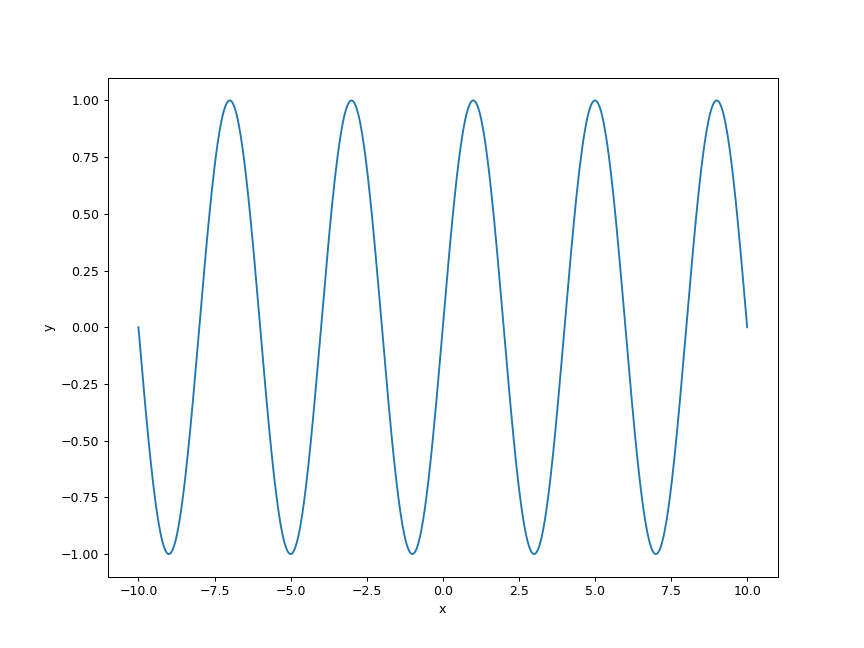

Text(0, 0.5, 'y')

In [69]:
# load relevant modules from header file
%run ../../header.ipynb

x = np.linspace(-10,10,1000);

plt.plot(x,np.sin(np.pi/2 * x));

plt.xlabel('x')
plt.ylabel('y')

<IPython.core.display.Javascript object>


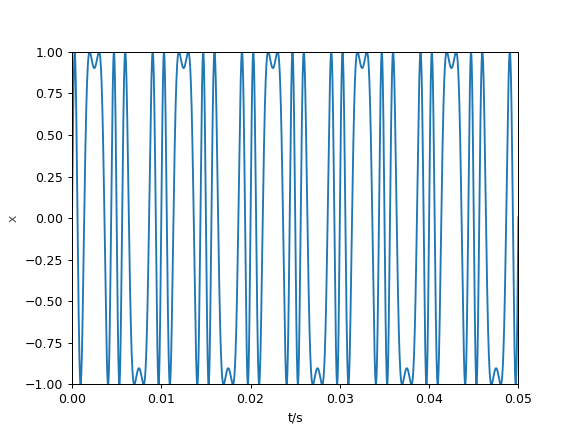

interactive(children=(FloatSlider(value=1.0, description='gain', max=10.0, min=1.0), Output()), _dom_classes=(…

In [88]:
# load relevant modules from header file
%run ../../header.ipynb
 


# define wavefolding function

def wavefolder(x, f, g):
    
    y = np.sin(x*g)
    
    return(y)

# basic parameters
fs = 48000
L  = 48000

t  = np.linspace(0,1,L)
f  = np.linspace(-0.5,0.5,L)


x    = np.sin(2*np.pi*100*t)
gain = 1

y    = wavefolder(x,0,gain)
 

fig1, ax1 = plt.subplots()
 

ax1.set_xlabel('t/s')
ax1.set_ylabel('x' ,color = [ 0.3, 0.3, 0.3])
ax1.set_xlim(0, 0.05) 
ax1.set_ylim(-1, 1) 


#ipd.display(ipd.Audio(y, rate=fs))
line, = ax1.plot(t,y);


def update(gain = widgets.FloatSlider(min = 1, max= 10, step=0.1, value=1)):

    y = wavefolder(x,0,gain)
    
    line.set_ydata(y)
    fig1.canvas.draw()
 
    ipd.display(ipd.Audio(y, rate=fs))
    fig1.canvas.set_window_title('Folded Signal')

interact(update, continuous_update=False); 


<IPython.core.display.Javascript object>


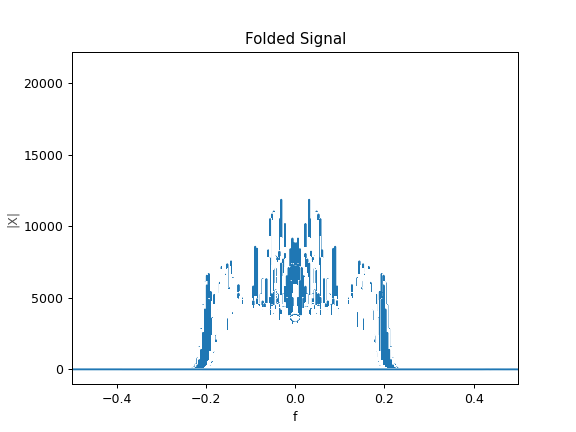

interactive(children=(FloatSlider(value=1.0, description='gain', min=1.0), Output()), _dom_classes=('widget-in…

In [87]:
# load relevant modules from header file
%run ../../header.ipynb

# define wavefolding function
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
def wavefolder(x, f, g):
    
    y = np.sin(x*g)
    
    return(y)

# basic parameters
fs = 48000
L  = 48000

t  = np.linspace(0,1,L)
f  = np.linspace(-0.5,0.5,L)


x    = np.sin(2*np.pi*100*t)
gain = 1

y    = wavefolder(x,0,gain)
 

fig1, ax1 = plt.subplots()
 
plt.title("Folded Signal")

ax1.set_xlabel('f')
ax1.set_ylabel('|X|' ,color = [ 0.3, 0.3, 0.3])
ax1.set_xlim(-0.5,0.5) 
#ax1.set_ylim(-1, 1) 

#ipd.display(ipd.Audio(y, rate=fs))
Y = np.fft.fftshift(np.fft.fft(y))
line, = ax1.plot(f,abs(Y));

def update(gain = widgets.FloatSlider(min = 1, max= 100, step=0.1, value=1)):

    y = wavefolder(x,0,gain)
    Y = np.fft.fftshift(np.fft.fft(y))
    line.set_ydata(abs(Y))
    fig1.canvas.draw()
 
    ipd.display(ipd.Audio(y, rate=fs))
    
     
interact(update, continuous_update=False); 


 
